In [72]:
import pandas as pd
import numpy as np
from modsim import *
import matplotlib.pyplot as plt


# data = pd.read_csv('ecg_data1.csv', header = 0)

ecg_data = pd.read_csv('data/ecg_data.csv', index_col='time');
print (ecg_data.head())
# print(data.CH2[:50])

           CH1       CH2       CH3       CH4  CH5  CH6  CH7  CH8  Column1
time                                                                     
1     0.023452 -0.003159 -0.011702  0.400032  0.4  0.4  0.4  0.4      NaN
2     0.023450 -0.003158 -0.011715  0.400031  0.4  0.4  0.4  0.4      NaN
3     0.023452 -0.003143 -0.011648  0.400027  0.4  0.4  0.4  0.4      NaN
4     0.023458 -0.003119 -0.011527  0.400021  0.4  0.4  0.4  0.4      NaN
5     0.023469 -0.003096 -0.011398  0.400014  0.4  0.4  0.4  0.4      NaN


In [74]:
ecg_table=ecg_data.head()

In [22]:
print(data.columns[0:4])


Index(['CH1', 'CH2', 'CH3', 'CH4'], dtype='object')


In [75]:
# path_file="/data/ecg_data1.csv"
# d=pd.read_csv(path_file)
# print(d.head())

print(ecg_data.CH1[:10])

time
1     0.023452
2     0.023450
3     0.023452
4     0.023458
5     0.023469
6     0.023483
7     0.023499
8     0.023512
9     0.023521
10    0.023524
Name: CH1, dtype: float64


In [70]:
plt.figure(figsize=(10,8))
plt.plot(data.CH1[1100:1500])


AttributeError: 'numpy.ndarray' object has no attribute 'CH1'

<Figure size 720x576 with 0 Axes>

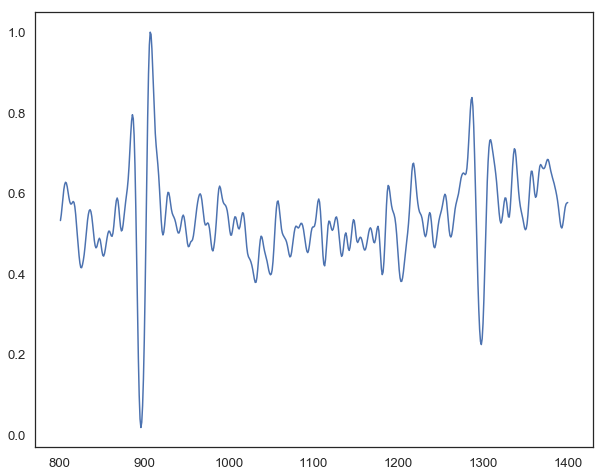

In [78]:
data_max=max(ecg_data.CH1)
data_min=min(ecg_data.CH1)
ecg_table=(ecg_data.CH1-data_min)/(data_max-data_min)
plt.figure(figsize=(10,8))
plt.plot(ecg_table[800:1400])

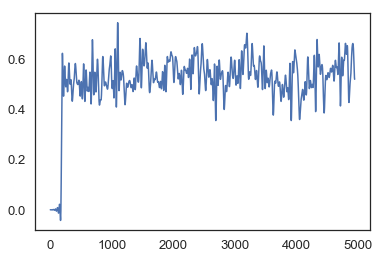

In [63]:
from modsim import *

from scipy.signal import kaiserord, lfilter, firwin, freqz

import numpy as np
 
import wave
 
import struct
 
import matplotlib.pyplot as plt

import time
def my_fir(combined_signal):
        # The Nyquist rate of the signal.
        sampling_rate = 1000
       
        nyq_rate = sampling_rate / 2.0

        # The desired width of the transition from pass to stop,
        # relative to the Nyquist rate.  We'll design the filter
        # with a 5 Hz transition width.
        width = 10.0/nyq_rate

        # The desired attenuation in the stop band, in dB.
        ripple_db = 60.0

        # Compute the order and Kaiser parameter for the FIR filter.
        N, beta = kaiserord(ripple_db, width)

        # The cutoff frequency of the filter.
        cutoff_hz = 30.0

        # Use firwin with a Kaiser window to create a lowpass FIR filter.
        taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

        # Use lfilter to filter x with the FIR filter.
        filtered_x = lfilter(taps, 1.0, combined_signal)

        # plt.plot(filtered_x[:500])
        return(filtered_x)

data=my_fir(table)
plt.plot(data)

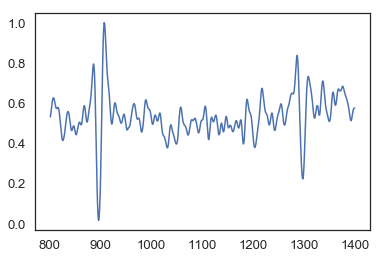

In [100]:
# t= len(data.CH1)
# for i in range(t):
#     a=max(data.CH1)
# #     b=min(data.CH1)
# #     data.CH1[i]=(data.CH1[i]-b)/(b-a)
# print(data.CH1[:100])

TypeError: 'int' object is not callable

In [17]:
len=int(len(table)/128)*128


In [67]:
a=max(data.CH1)
b=min(data.CH1)
table=data.CH1-b/b-a
print(table.head(),len(table))
plt.plot(table)

AttributeError: 'numpy.ndarray' object has no attribute 'CH1'

In [90]:
data.CH1[1]

0.023451691

In [15]:
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000

# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 15000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000


h=[2,    10,    14,     7,    -7,   -17,   -13 ,    3,
    19,    21,     4,   -21,   -32,   -16,    18 ,   43,
    34,    -8,   -51,   -56,   -11,    53,    81 ,   41,
    -44,  -104,   -81,    19,   119,   129,    24 , -119,
    -178,   -88,    95,   222,   171,   -41,  -248 , -266,
    -50,   244,   366,   181,  -195,  -457,  -353 ,   85,
    522,   568,   109,  -540,  -831,  -424,   474 , 1163,
    953,  -245, -1661, -2042,  -463,  2940,  6859 , 9469,
    9969,  6859,  2940,  -463, -2042, -1661,  -245 ,  953,
    1163,   474,  -424,  -831,  -540,   109,   568 ,  522,
    85,  -353,  -457,  -195,   181,   366,   244 ,  -50,
    -266,  -248,   -41,   171,   222,    95,   -88 , -178,
    -119,    24,   129,   119,    19,   -81,  -104 ,  -44,
    41,    81,    53,   -11,   -56,   -51,    -8 ,   34,
    43,    18,   -16,   -32,   -21,     4,    21 ,   19,
    3,   -13,   -17,    -7,     7,    14,    10 ,   -2];
#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

# Add them to create a noisy signal
 
combined_signal = sine_wave[:4900] + sine_noise[:4900]

length_h =len(h)

def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    for i in range (sampling_rate):
        acc=0
        for j in range(128):                   
            acc+=h[j]*signal[i-j]
        output[i]= acc
    return output
signal_after_filter=fir_low(table,1000)

plt.plot(signal_after_filter[:1000])
# print(len(sine_wave),len(sine_noise))
# print(len(combined_signal))

KeyError: 0

5.784349203543829 5.773403770416385


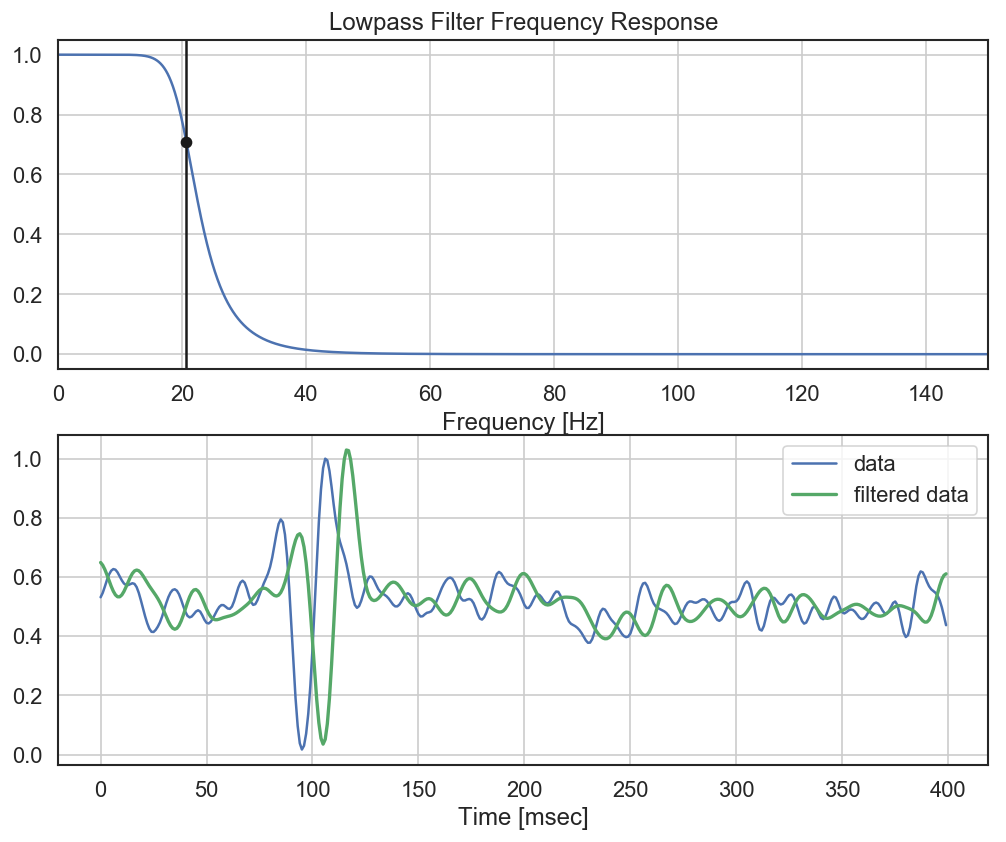

<Figure size 1600x640 with 0 Axes>

In [135]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8),dpi = 120,facecolor='w', edgecolor='k')


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

# Filter requirements.
order = 6
fs = 300.0       # sample rate, Hz
cutoff = 20.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
# data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
# print(type(data),type(ecg_table))
data=np.array(ecg_table)
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

print(signaltonoise(data), signaltonoise(y*1.2))
plt.subplot(2, 1, 2)
plt.plot( data[800:1200], 'b-', label='data')
plt.plot( y[800:1200], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [msec]')
plt.grid()
plt.legend()

plt.figure(figsize=(20,8),dpi = 80)
plt.subplots_adjust(hspace=0.35)
plt.show()


In [88]:
print(type(data),type(ecg_table))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [91]:
print(type(data),type(np.array(ecg_table)))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [93]:
len(data)

4950

5.784349203543829 5.611630435916878
15.245090072293287
14.981781240972165


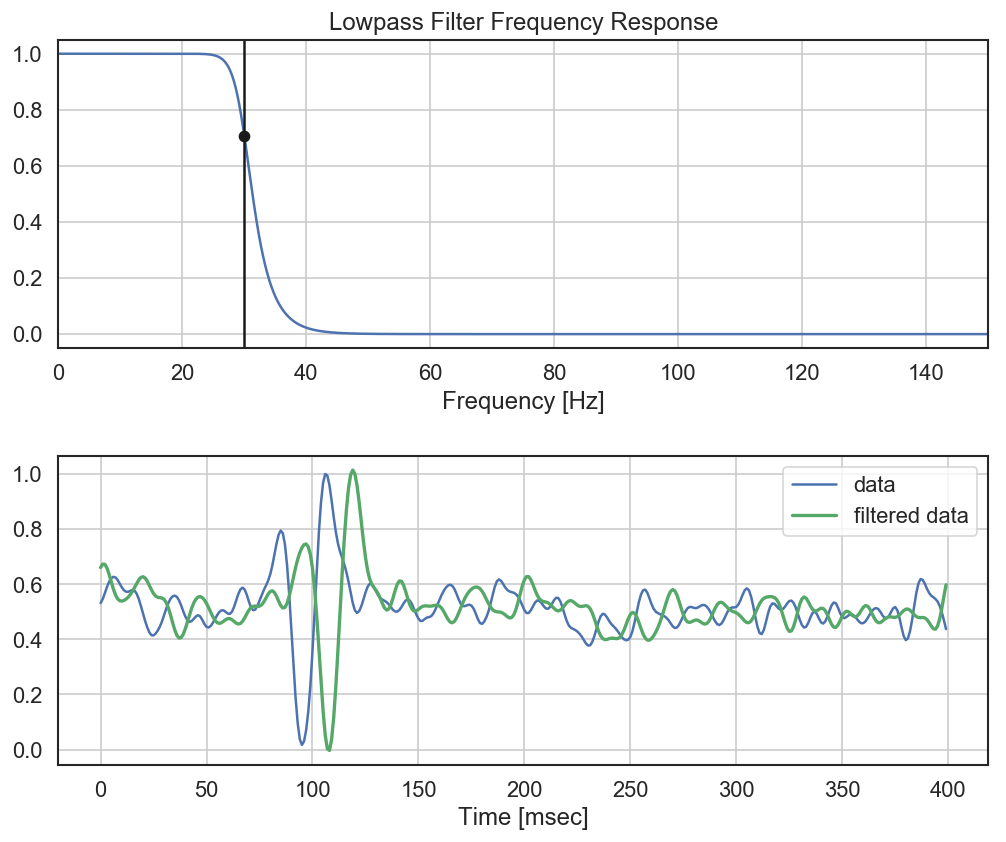

In [191]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from math import log, log10

plt.figure(figsize=(10,8),dpi = 120,facecolor='w', edgecolor='k')


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

def low_pass(data,cutoff=20,):

    # Filter requirements.
    order = 12
    fs = 300.0       # sample rate, Hz
    cutoff = cutoff  # desired cutoff frequency of the filter, Hz

    # Get the filter coefficients so we can check its frequency response.
    b, a = butter_lowpass(cutoff, fs, order)

    # Plot the frequency response.
    w, h = freqz(b, a, worN=8000)
    plt.subplot(2, 1, 1)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5*fs)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()


    # Demonstrate the use of the filter.
    # First make some data to be filtered.
    T = 5.0         # seconds
    n = int(T * fs) # total number of samples
    t = np.linspace(0, T, n, endpoint=False)
    # "Noisy" data.  We want to recover the 1.2 Hz signal from this.
    # data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
    # print(type(data),type(ecg_table))
    data=np.array(data)
    # Filter the data, and plot both the original and filtered signals.
    y = butter_lowpass_filter(data, cutoff, fs, order)
    return y 

# snr_table =np.zeros(120)
# print(len(snr_table))
# for i in range (10,100):
#     y=low_pass(ecg_table,i)
#     snr_table[i]=signaltonoise(y)
y=low_pass(ecg_table,cutoff=30)
print(signaltonoise(ecg_table), signaltonoise(y))
print(20*log10(signaltonoise(ecg_table)))
print(20*log10(signaltonoise(y)))
snr_table =[]

plt.subplot(2, 1, 2)
plt.plot(np.array(ecg_table[800:1200]), 'b-', label='data')
plt.plot( y[800:1200], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [msec]')
plt.grid()
plt.legend()


plt.subplots_adjust(hspace=0.35)
plt.show()